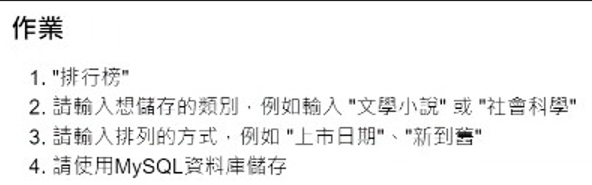

In [8]:
import pymysql

conn=pymysql.connect(host='localhost',
        port=3306,
        user="root",
        passwd="1234",
        charset="utf8",
        db="homeworkdb") 


# 建立資料庫SCHEMA
with conn.cursor() as cursor:
    sql='''
    CREATE TABLE IF NOT EXISTS bookrank (
        ID int NOT NULL AUTO_INCREMENT PRIMARY KEY,
        Category varchar(20),
        Level varchar(10),
        Title varchar(255),
        Publish varchar(255),
        Price varchar(20)
    );
    '''
    cursor.execute(sql)  
    conn.commit()  
conn.close()

In [14]:
import requests
from bs4 import BeautifulSoup
import pymysql
from time import sleep

conn=pymysql.connect(host='localhost',
        port=3306,
        user="root",
        passwd="1234",
        charset="utf8",
        db="homeworkdb") 
list1=[]
kindno=1  #要下載的分類，預設為第一分類：文學小說，主要還是Input
url="https://www.books.com.tw/web/sys_newtopb/books/"
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/64.0.3282.186 Safari/537.36 "}
html=requests.get(url,headers=headers).text
sp=BeautifulSoup(html,'lxml')

# 中文新書分類，取得【分類資訊】
res=sp.find("div",class_="mod_b type02_l001-1 clearfix")
hrefs=res.select("a")    
        
        
def showpage(kindurl,kind):
    html=requests.get(kindurl,headers=headers).text
    sp=BeautifulSoup(html,'lxml')
    data=sp.find_all("div",{"class":"mod_a clearfix"})[0]
    item=data.select(".item")
    for items in item:
        level=items.select("p")[0].text
        booklist=items.select("h4")[0].text  
        publish=items.select("li")[0].text
        price=items.select(".price_a")[0].text
        listdata=[kind,level,booklist,publish,price]
        list1.append(listdata)
        
        
def twobyte(kindno):  #轉成兩位數
    if kindno<10:  #如果只有一位數
        kindnostr="0"+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr


def dbsave(kind,list1):
    with conn.cursor() as cursor:
        sql='''insert into bookrank(Category,Level,Title,Publish,Price)
        values(%s,%s,%s,%s,%s)
        '''
        for listdata in list1:
                cursor.execute(sql, listdata)
        conn.commit()
    conn.close()


# 主程式
for i in range(len(hrefs)-1):  #不拿總榜
    print(i+1,hrefs[i+1].text)  #不拿總榜
print("=============================")
kindno=int(input("請輸入要查詢的類別代碼："))
if 0<kindno<=len(hrefs):  #不可超過串列長度
    kind=hrefs[kindno-1].text  #分類名稱
    print("下載的分類編號:{}  分類名稱:{}".format(kindno,kind))
    #  下載指定的分類
    kindurl=url+twobyte(kindno)  #拆解網址的組成，【共同網址+分類編號】，導向分類網址
    print(kindurl)
    showpage(kindurl,kind)
    print("...正在寫入資料...")
    dbsave(kind,list1)
else:
    print("分類不存在")
print("儲存完畢!!!")

1 文學小說
2 商業理財
3 藝術設計
4 人文史地
5 社會科學
6 心理勵志
7 宗教命理
8 自然科普
9 醫療保健
10 飲食
11 生活風格
12 旅遊
13 童書/青少年文學
14 國中小參考書
15 親子教養
16 影視偶像
17 輕小說
18 漫畫/圖文書
19 語言學習
20 考試用書
21 電腦資訊
22 專業/教科書/政府出版品
請輸入要查詢的類別代碼：4
下載的分類編號:4  分類名稱:藝術設計
https://www.books.com.tw/web/sys_newtopb/books/04
...正在寫入資料...
儲存完畢!!!


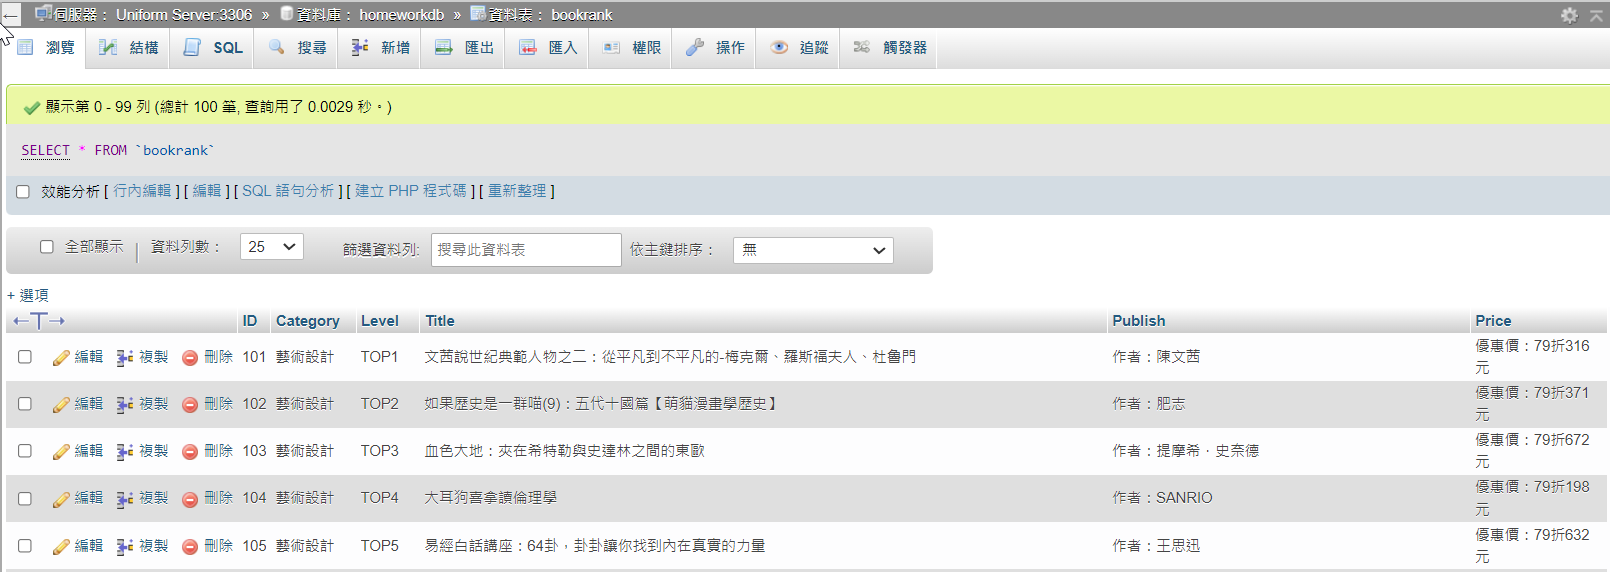
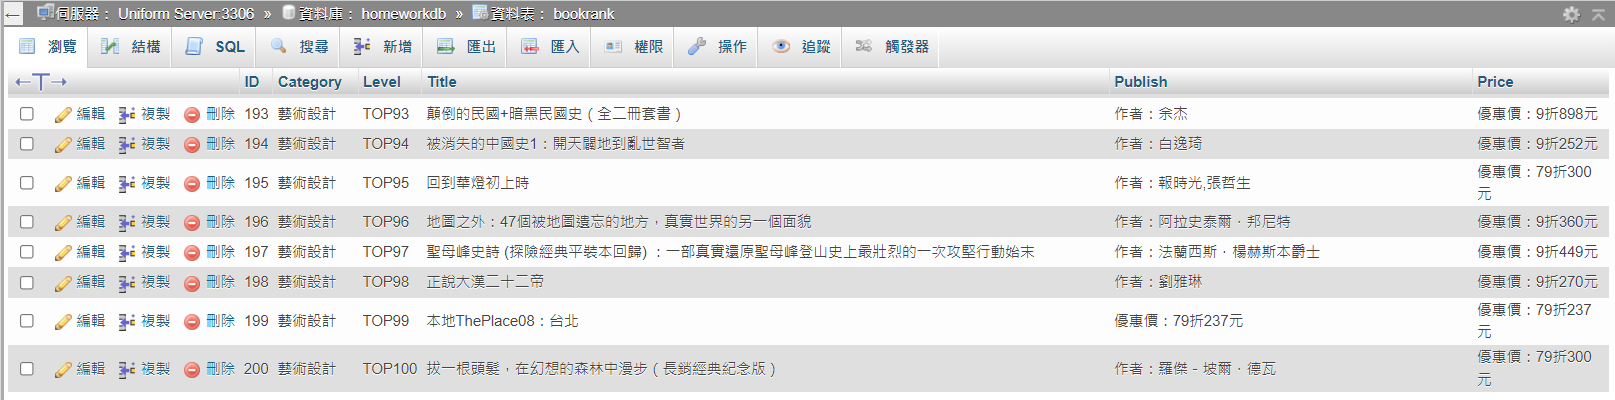